In [1]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
data = pd.read_csv('../2-Data_Cleaning/movies_all.csv')

In [3]:
data

,电影名,导演,编剧,演员,类型,电影时长(分钟),上映时间(年),评分,票房,发行公司,制片公司
0,角斗士 Gladiator,雷德利·斯科特,"大卫·弗兰佐尼,约翰·洛根,威廉姆·尼克尔森","罗素·克劳,华金·菲尼克斯,康妮·尼尔森,奥列佛·里德,理查德·哈里斯,德里克·雅各比,杰曼...",剧情,155,2000,8.5,0.0,暂无发行公司,暂无制片公司
1,外出就餐3：饕餮自助 Eating Out 3: All You Can Eat,葛伦·盖洛,"菲利普·J·巴特尔,亚伦·布洛卡","利百加·科汉,克里斯·萨尔瓦多,迈克尔E.R.沃克,敏科·斯荳,莱斯利·乔丹,素玛立·蒙塔诺...",喜剧,80,2009,6.6,0.0,暂无发行公司,暂无制片公司
2,蝴蝶效应2 The Butterfly Effect 2,约翰·R·莱昂耐迪,Michael D. Weiss,"埃里克·里夫利,埃莉卡·杜兰斯,达斯汀·米利甘,吉娜·赫尔顿,林赛·麦克斯维尔",剧情,92,2006,6.1,0.0,暂无发行公司,暂无制片公司
3,铁血柔情 Love Me Tender,罗伯特·D·韦布,"莫里斯·杰拉蒂,罗伯特·巴克纳","Richard Egan,Debra Paget,Elvis Presley",剧情,89,1956,7.2,0.0,暂无发行公司,暂无制片公司
4,冰川时代 Ice Age,卡洛斯·沙尔丹哈,"迈克尔·伯格 ,迈克尔·J·威尔森,彼得·阿克曼","雷·罗马诺,约翰·雷吉扎莫,丹尼斯·利瑞,杰克·布莱克",喜剧,81,2002,8.6,0.0,暂无发行公司,暂无制片公司
5,危情雪夜,陈国星,郝建,"陶泽如,吴越,高明,何冰,马伊琍,张涵予",剧情,84,2004,5.9,0.0,暂无发行公司,暂无制片公司
6,李尔王 Great Performances: King Lear,特雷弗·纳恩,莎士比亚,"伊恩·麦克莱恩,菲利普·文切斯特,弗兰西斯·巴贝,莫妮卡·杜兰,萝玛拉·嘉瑞,西尔维斯特·迈...",剧情,150,2008,8.3,0.0,暂无发行公司,暂无制片公司
7,极限特工2 xXx: State of the Union,李·塔玛霍瑞,西蒙·金伯格,"艾斯·库珀,塞缪尔·杰克逊,威廉·达福,斯科特·斯比德曼,彼得·斯特劳斯,桑妮·马布雷,诺娜·加耶",动作,101,2005,6.6,0.0,暂无发行公司,暂无制片公司
8,大逃杀 バトル・ロワイアル,深作欣二,"深作健太,高见广春","藤原龙也,前田亚季,山本太郎,北野武,栗山千明,高冈奏辅,塚本高史,小谷幸弘,石川绘里,神谷...",剧情,114,2000,8.0,0.0,暂无发行公司,暂无制片公司
9,蜀山奇侠,萧笙,"林少枝,钟政良,吴玉章,曾广平","杨宝玲,李婉华,李丽丽,龚慈恩,关礼杰",爱情,120,1990,8.2,0.0,暂无发行公司,暂无制片公司


In [4]:
# 1.数据选择与清洗与分类

#选取发行公司存在且票房不为0的数据
data = data[(data['发行公司']!='暂无发行公司') & (data['票房']!=0)]

#正则表达式将发行公司英文去除
IssuingCompany_re = []
for i in data['发行公司']:
    IssuingCompany_re.append((re.search(r'[\u4E00-\u9FA5]+',i)).group(0))

#更新发行公司
data['发行公司'] = IssuingCompany_re    

#按发行公司分类
grouped = data.groupby(by='发行公司')

#将发行公司与相对应的总票房存入列表当中
IssuingCompany = []
BoxOffice = []
for i,j in grouped:
    IssuingCompany.append(i)
    BoxOffice.append(j['票房'].sum().round(1))

D:\Anconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [5]:
# 2.数据的拼接排序与选择

#拼接列表为Dataframe并按票房大小逆序排序
IssuingCompany_BoxOffice = pd.DataFrame({'发行公司':IssuingCompany,'票房':BoxOffice})
IssuingCompany_BoxOffice.sort_values(by='票房',ascending=False,inplace=True)

#取出总票房前10的发行公司与票房数据
IssuingCompany_ten = [i for i in IssuingCompany_BoxOffice['发行公司'].head(10)]
BoxOffice_ten = [i for i in IssuingCompany_BoxOffice['票房'].head(10)]

#查看数据
IssuingCompany_BoxOffice

,发行公司,票房
33,北京光线影业有限公司,1387045.4
17,中国电影集团公司,1205333.5
27,五洲电影发行有限公司,1054974.4
65,华谊兄弟传媒股份有限公司,1039036.2
30,北京京西文化旅游股份有限公司,997613.0
81,天津猫眼微影文化传媒有限公司,953523.6
61,华夏电影发行有限责任公司,732738.2
146,霍尔果斯博纳文化传媒有限公司,411640.4
23,乐创文娱,396499.3
0,万达影视传媒有限公司,374433.0


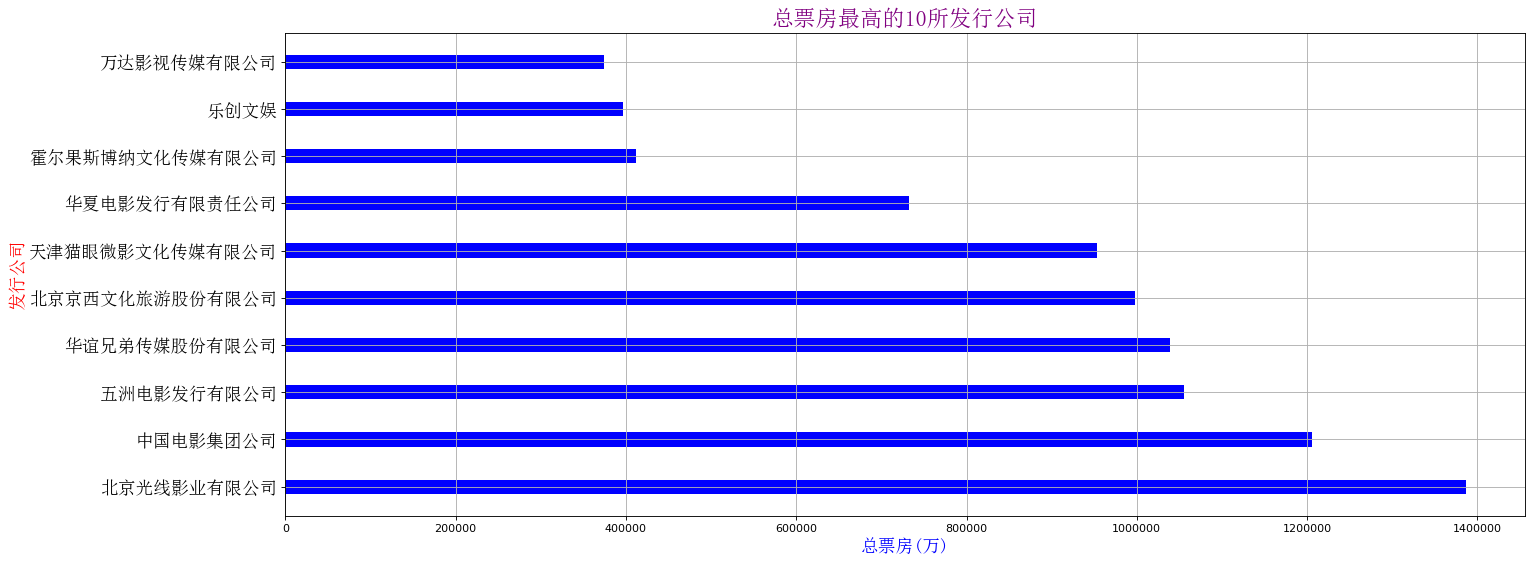

In [6]:
# 3.绘制图片

#设置图片大小
plt.figure(figsize=(20,8),dpi=80)

#设置字体
my_font = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=16)
my_fonts = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=20)

#绘制图片
plt.barh(range(len(IssuingCompany_ten)),BoxOffice_ten,height=0.3,color="blue")

#设置y轴的刻度
plt.yticks(range(len(IssuingCompany_ten)),IssuingCompany_ten,fontproperties=my_font)

#添加描述信息
plt.xlabel("总票房(万)",fontproperties=my_font,color='blue')
plt.ylabel("发行公司",fontproperties=my_font,color='red')
plt.title("总票房最高的10所发行公司",fontproperties=my_fonts,color='purple')

#绘制表格
plt.grid()

#保存图片
plt.savefig("./总票房最高的10所发行公司.png") #保存为.svg格式矢量图，不会有失帧

#展示图片
plt.show()